# Advanced Multivariate Statistics: Pokemon Dataset
**Author:** Francisco Solís Pedraza  

This notebook focuses on the multivariate relationships within the Pokemon dataset, exploring how base stats interact and how categorical variables (Types) influence the overall power of a Pokémon.

---

## 1. Data Loading and Preprocessing
We prepare the dataset by removing non-statistical identifiers and keeping only the relevant features for multivariate analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset
try:
    df = pd.read_csv('../data/pokemon_final.csv')
    # Dropping non-statistical columns
    data = df.drop(["number", "name", "total"], axis=1)
    print("Dataset prepared for multivariate analysis.")
except FileNotFoundError:
    print("Error: Ensure '../data/Pokemon_final.csv' exists.")

data.head()

Dataset prepared for multivariate analysis.


,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,Grass,Poison,45,49,49,65,65,45,1,0
1,Grass,Poison,60,62,63,80,80,60,1,0
2,Grass,Poison,80,82,83,100,100,80,1,0
3,Grass,Poison,80,100,123,122,120,80,1,0
4,Grass,Poison,80,82,83,100,100,80,1,0


## 2. Global Distribution Analysis
Before multivariate modeling, we analyze the distribution of each variable to identify skewness and potential outliers.

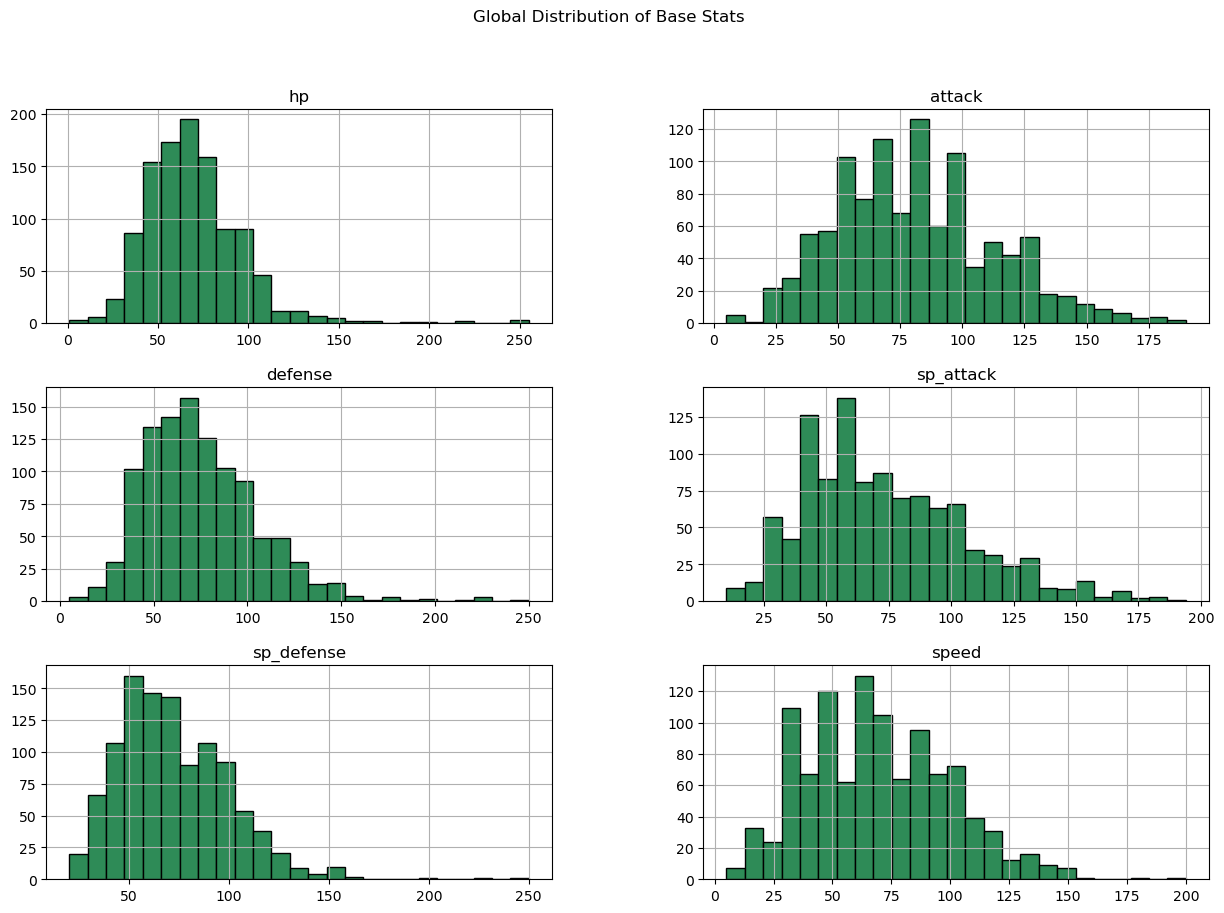

In [2]:
# Histograms for all numeric variables
stats_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
data[stats_cols].hist(bins=25, figsize=(15, 10), color='seagreen', edgecolor='black')
plt.suptitle('Global Distribution of Base Stats')
plt.show()

## 3. Multivariate Interaction: Correlation & Covariance
We explore how stats move together. A high covariance between certain stats might indicate specific "roles" (e.g., Physical Sweepers, Special Tanks).

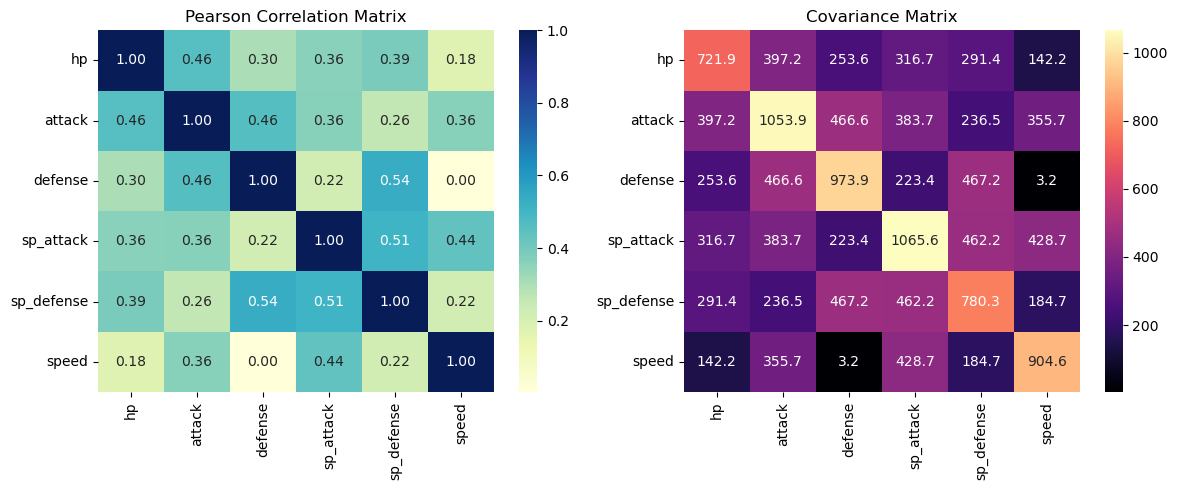

In [3]:
# Correlation Matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(data[stats_cols].corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Pearson Correlation Matrix')

# Covariance Matrix
plt.subplot(1, 2, 2)
sns.heatmap(data[stats_cols].cov(), annot=True, cmap='magma', fmt='.1f')
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

## 4. Normality Testing (Kolmogorov-Smirnov)
In multivariate statistics, checking for normality is crucial. We apply the KS test to each dimension.

In [4]:
# Kolmogorov-Smirnov test for each numeric column
for col in stats_cols:
    k_stat, p_val = stats.kstest(data[col], 'norm')
    print(f"KS Test for {col:10} | p-value: {p_val:.4e}")

KS Test for hp         | p-value: 0.0000e+00
KS Test for attack     | p-value: 0.0000e+00
KS Test for defense    | p-value: 0.0000e+00
KS Test for sp_attack  | p-value: 0.0000e+00
KS Test for sp_defense | p-value: 0.0000e+00
KS Test for speed      | p-value: 0.0000e+00


## 5. Multivariate Regression with Categorical Encoding
To analyze how Pokémon Types influence stats, we use **One-Hot Encoding** to transform categorical data into numeric dummies.

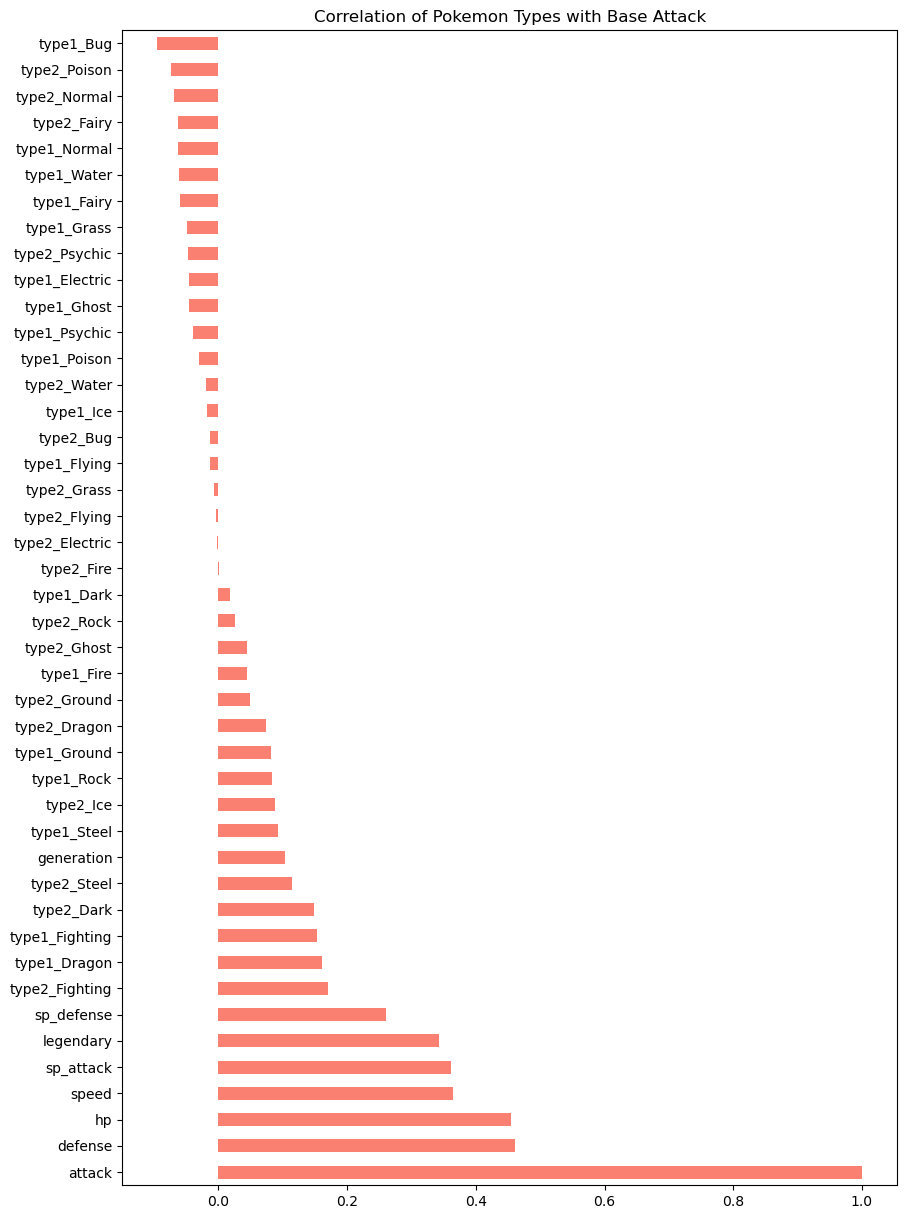

In [6]:
# Create dummies for type1 and type2
data_encoded = pd.get_dummies(data, columns=["type1", "type2"], prefix=["type1", "type2"])

# Correlation of stats with specific types (Example: Attack)
plt.figure(figsize=(10, 15))
type_corr = data_encoded.corr()['attack'].sort_values(ascending=False)
type_corr.plot(kind='barh', color='salmon')
plt.title('Correlation of Pokemon Types with Base Attack')
plt.show()

## 6. Conclusions
* **Feature Interaction:** The correlation matrix reveals that Special Defense and Defense have a significant relationship, suggesting a design focus on "overall bulk".
* **Categorical Impact:** Through One-Hot Encoding, we can see how specific types (like Dragon or Steel) correlate positively with higher base stat totals.
* **Non-Normality:** All base stats failed the KS normality test, confirming that non-parametric methods are more suitable for this dataset.